## Concrete Mixture Designer and Strength Predictor(CMDSP)

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Concrete_Data.csv')

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [6]:
df.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [7]:
# renaming columns
df.columns = ['cement','slag','fly ash','water','superplasticizer','coarse agg','fine agg','age','strength']

In [8]:
# features and label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [9]:
X.var()

cement              10921.580220
slag                 7444.124812
fly ash              4095.616541
water                 456.002651
superplasticizer       35.686781
coarse agg           6045.677357
fine agg             6428.187792
age                  3990.437729
dtype: float64

In [10]:
# normalizing data.
col=X.columns
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(np.array(X))

X=pd.DataFrame(X,columns=col)

In [11]:
X.var()

cement              0.056929
slag                0.057631
fly ash             0.102288
water               0.029091
superplasticizer    0.034419
coarse agg          0.051089
fine agg            0.040459
age                 0.030117
dtype: float64

## EDA

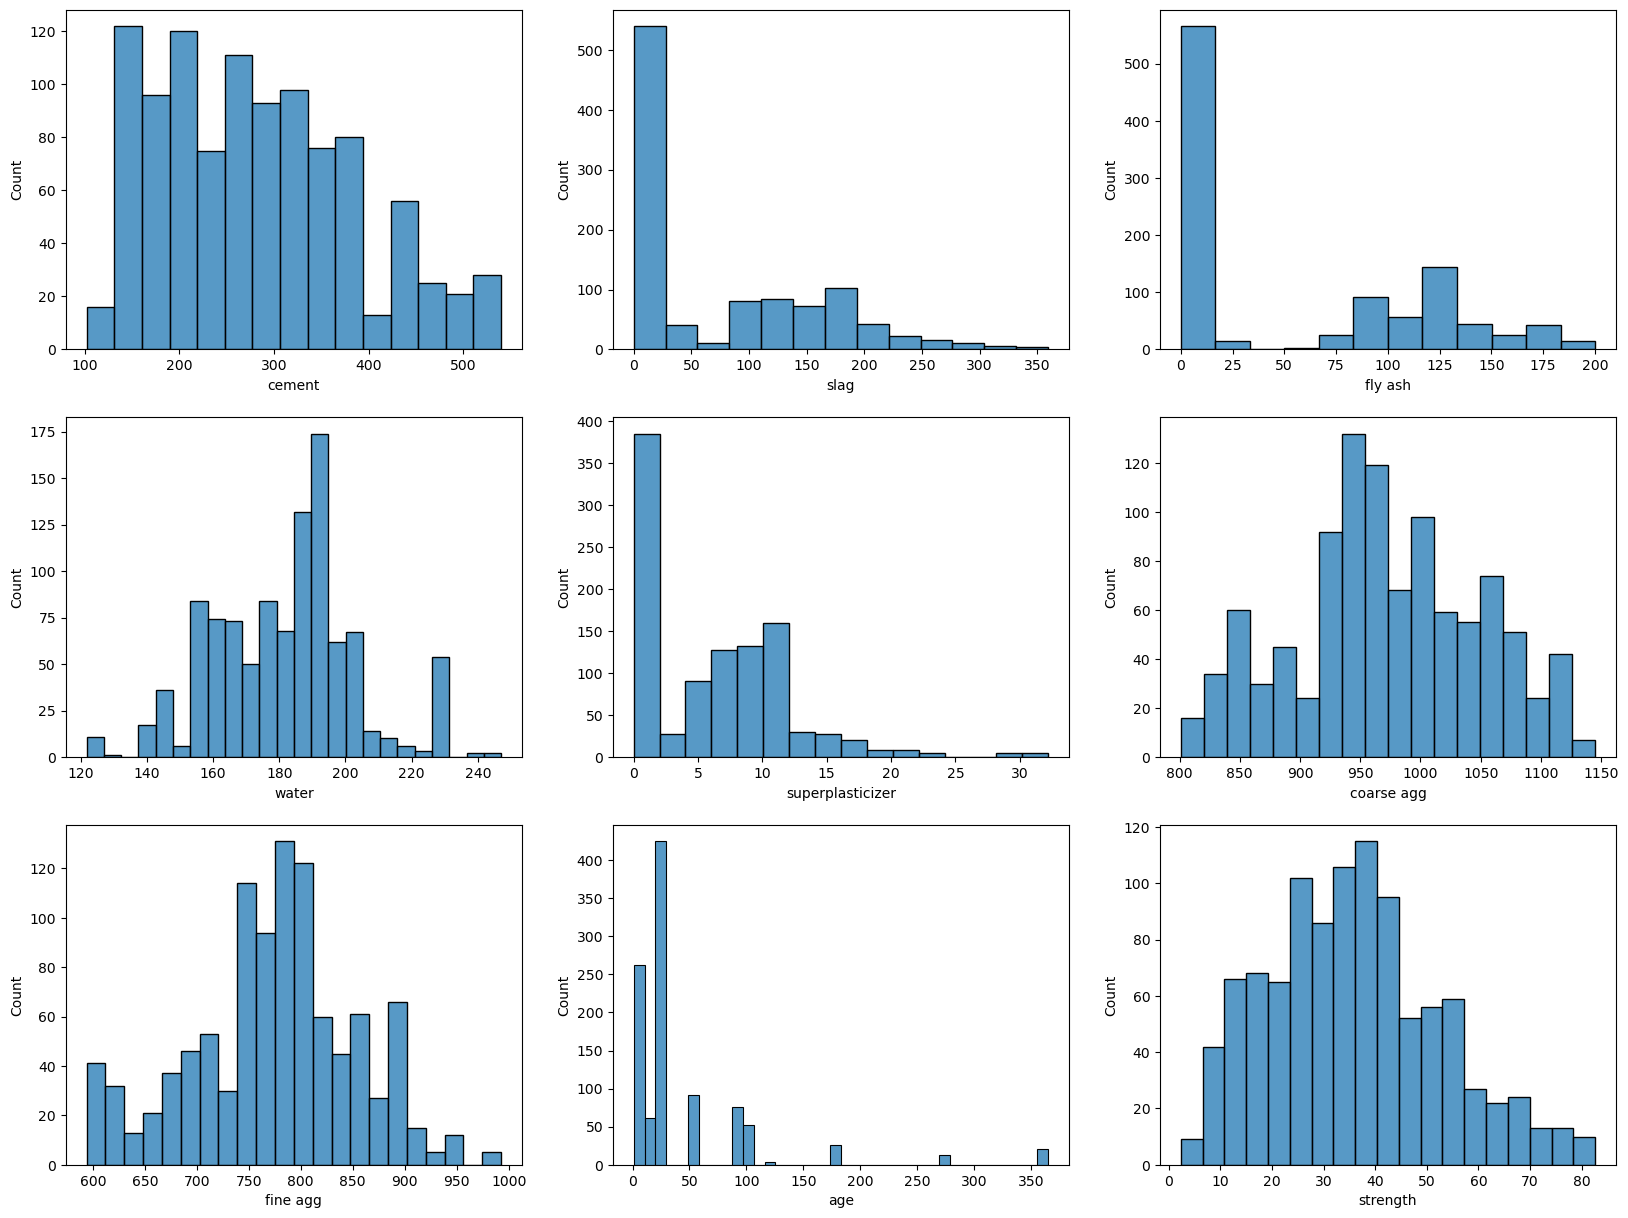

In [12]:
i = 1
plt.figure(figsize = (20, 15))
for col in df.columns:
    ax = plt.subplot(3, 3,i)
    sns.histplot(df[col])
    plt.xlabel(col)    
    i+= 1

plt.show()

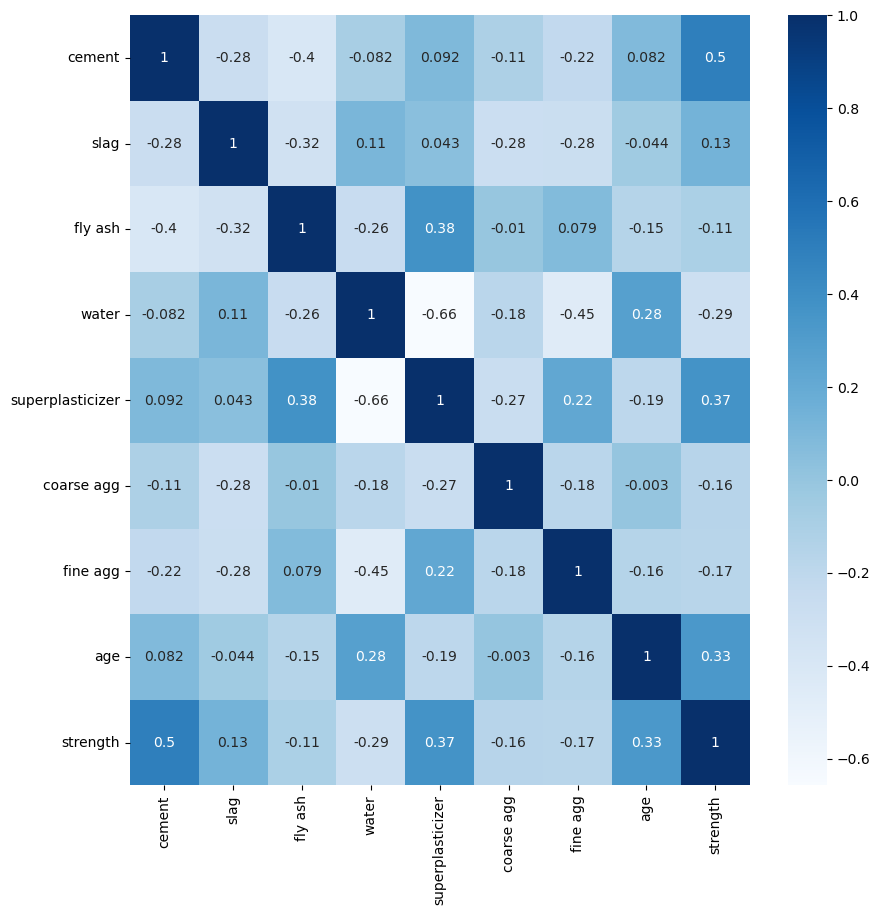

In [13]:
plt.figure(figsize = (10, 10))
corr = X.corr()
sns.heatmap(df.corr(), annot= True, cmap="Blues")
plt.show()

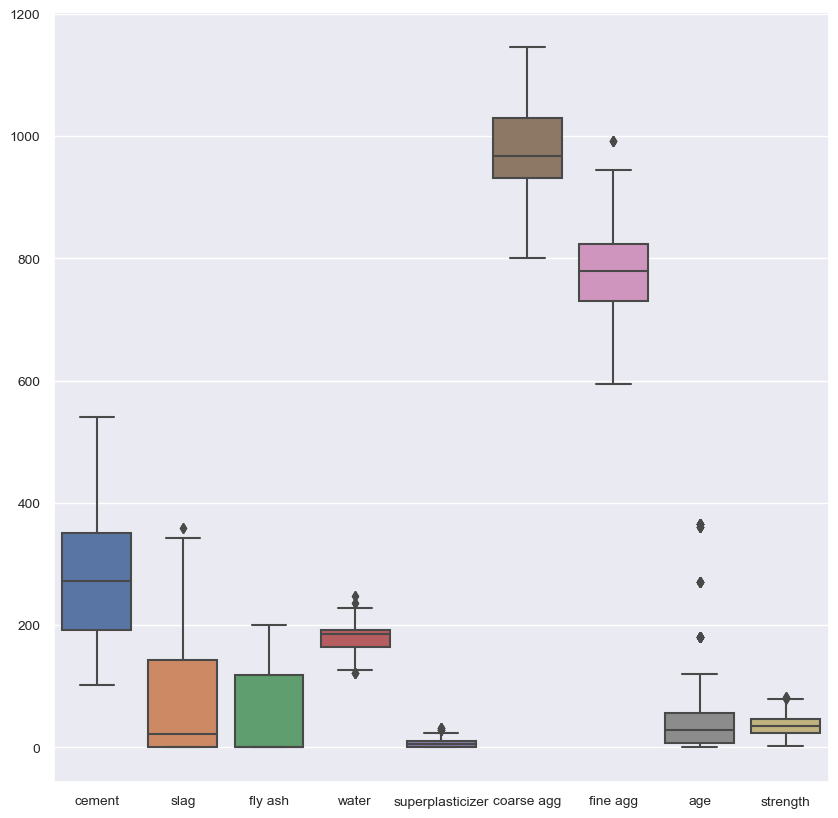

In [14]:
plt.figure(figsize = (10,10))
sns.set(font_scale=0.9)
box = sns.boxplot(data=df)

## Training and Test data split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Training Models 

### Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

from sklearn import metrics
print('r2_score for Training set:',metrics.r2_score(y_train, lr.predict(X_train)))
print('r2_score for Testing set:',metrics.r2_score(y_test, lr.predict(X_test)))

r2_score for Training set: 0.6115069045245725
r2_score for Testing set: 0.627397777600363


### Random Forest Regression

In [17]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

print('r2_score for Training set:',metrics.r2_score(y_train, rfr.predict(X_train)))
print('r2_score for Testing set:',metrics.r2_score(y_test, rfr.predict(X_test)))

r2_score for Training set: 0.9844693470039958
r2_score for Testing set: 0.9026638368522253


### Gradient Boost Regressor

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

print('r2_score for Training set:',metrics.r2_score(y_train, gbr.predict(X_train)))
print('r2_score for Testing set:',metrics.r2_score(y_test, gbr.predict(X_test)))

r2_score for Training set: 0.9504539222025548
r2_score for Testing set: 0.8976707057200796


### XGboost regressor

In [19]:
from xgboost import XGBRegressor
xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.2, max_depth = 5)
xgb.fit(X_train, y_train)

print('r2_score for Training set:',metrics.r2_score(y_train, xgb.predict(X_train)))
print('r2_score for Testing set:',metrics.r2_score(y_test, xgb.predict(X_test)))

r2_score for Training set: 0.9901170850430993
r2_score for Testing set: 0.9242190682418068


## Best fit model with highest r2_score on test set of around 0.92 is the XGboost regressor.